# 1 Import all neccessaries libaries
#2there are two dataframe to be read 
#3need to combined them
#4display the number of missing values in each of attributes and treat them accordingly
#5Perfroma the basic EDA
#6prepare/process data to train any ML model
#7spilit the data into train and test set size 30% of the original combined data
#8 USE any 4 classification algorithim learnt during the course fit models with train data and predict on test data
#9Compute the accuracy,recall,precision for each model
#10 try to improve performance by either dropping few columns or tuning the models
#11 create the dataframe witrh four columns model name, Accuracy, recall and precision popultae the datframe accordingly

In [1]:
##############1.............
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
col_labels = [ 'age','workclass','fnlwgt','education','education.num','marital.status','occupation','relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country','income']

In [2]:
####2......dataframe.............
dataframe = pd.read_csv('adult.data',sep = ',', names= col_labels)
dataframe_1  = pd.read_csv('adult.test',sep = ',', names = col_labels)

In [3]:
dataframe.shape

(32561, 15)

In [4]:
dataframe_1.shape

(16282, 15)

In [5]:
##3......Combining both datasets..

df = pd.concat([dataframe,dataframe_1])

In [6]:
##4...We didn’t explicitly set an index for any of the Dataframes we have used. For dataframe and datframe_1 default 
#indexes would have been created by pandas. When we concatenated the Dataframes the indexes were
#also concatenated resulting in duplicate entries.
#This is really only a problem if you need to access a row by its index. 
#We can fix the problem with the following code.

df=df.reset_index(drop=True)

In [7]:

###Null values handeled across axis 0
df = df.dropna(how='any',axis=0)

In [8]:
df.shape

(48842, 15)

In [9]:
df.head(50)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,160187.0,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,209642.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,45781.0,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,159449.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


In [ ]:
df.columns

# EDA

In [10]:
print(df['age'].nunique())
print(df['workclass'].unique())

146
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


In [11]:
df.isnull().sum(axis = 0)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
%timeit df.workclass.apply(lambda x: x.strip(' ?'))
%timeit df.occupation.apply(lambda x: x.strip(' ?'))
%timeit df.workclass.apply(lambda x: x.strip(' ?'))
%timeit df.relationship.apply(lambda x: x.strip(' ?'))
%timeit df.income.apply(lambda x: x.strip(' '))

In [12]:
df = df[df['native.country'] != ' ?']
df = df[df['occupation'] != ' ?']
df = df[df['workclass'] != ' ?']

In [13]:
print(df[df['native.country'] == ' ?'].shape)
print(df[df['occupation'] == ' ?'].shape)
print(df[df['workclass'] == ' ?'].shape)


(0, 15)
(0, 15)
(0, 15)


The maximum age is 90
The minimum age is 17


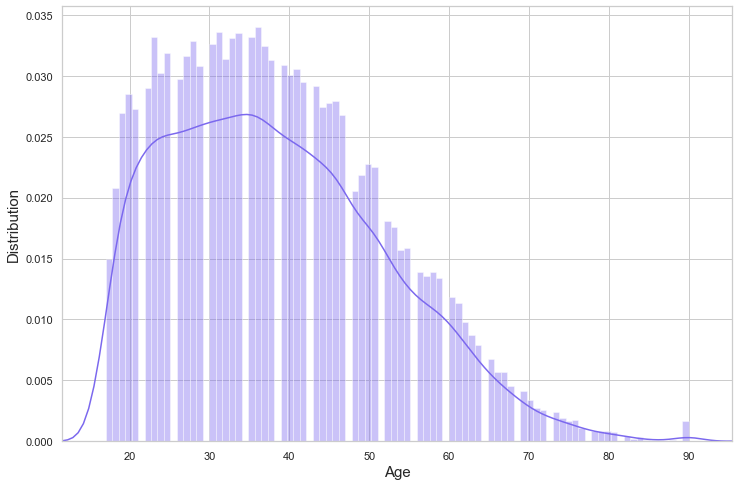

In [14]:
# This distribution plot shows the distribution of Age of people across the Data Set
plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style = 'whitegrid')

sns.distplot(dataframe['age'], bins = 90, color = 'mediumslateblue')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)

print ("The maximum age is", dataframe['age'].max())
print ("The minimum age is", dataframe['age'].min())

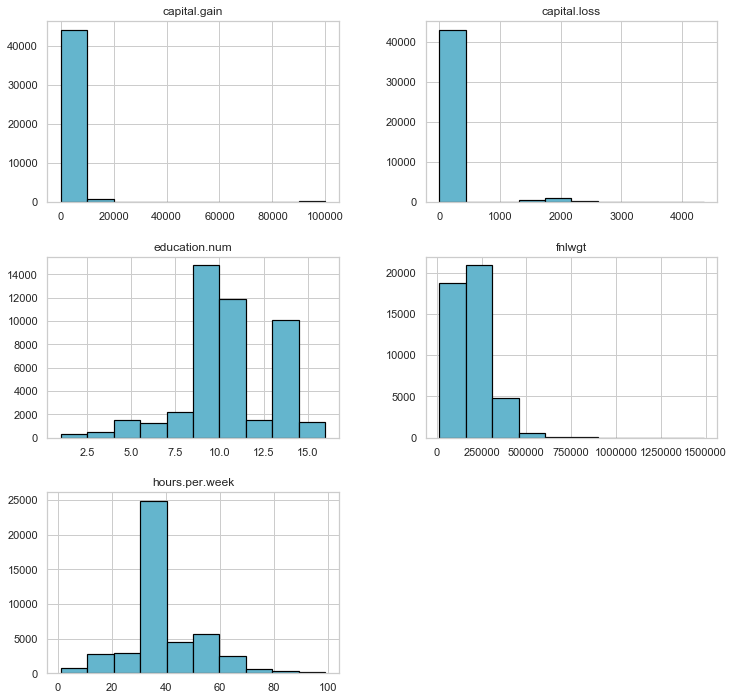

In [15]:
### Distribution of Different Features of the Dataset
distribution = df.hist(edgecolor = 'black', linewidth = 1.2, color = 'c')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

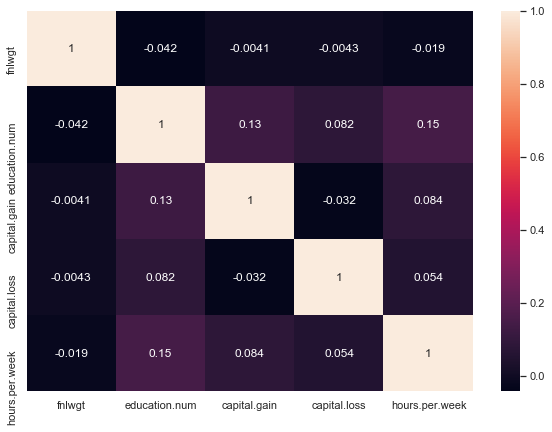

In [16]:
# This heatmap shows the Correlation between the different variables
plt.rcParams['figure.figsize'] = [10,7]
sns.heatmap(df.corr(), annot = True);

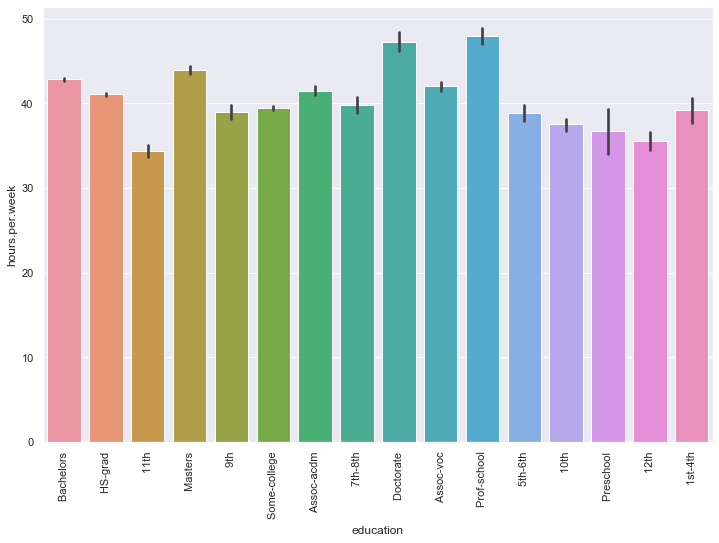

In [17]:
# This shows the hours per week according to the education of the person
sns.set(rc={'figure.figsize':(12,8)})
sns_grad = sns.barplot(x = df['education'], y = df['hours.per.week'], data =df)
plt.setp(sns_grad.get_xticklabels(), rotation=90);

In [18]:
# Checking the Difference between the values of the mean and median to get an idea about the amount of outliers
print (df['hours.per.week'].median())
print (df['hours.per.week'].mean())

40.0
40.93801689443191


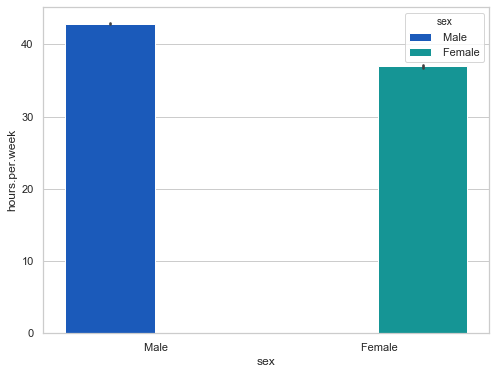

In [20]:
# This bar graph shows the difference of hours per week between male and female 
sns.set(style = 'whitegrid', rc={'figure.figsize':(8,6)})
sns.barplot(x = df['sex'], y = df['hours.per.week'], data = df,estimator = np.mean , hue = 'sex', palette = 'winter');

In [22]:
df['income'] = df['income'].str.replace(r' ', '')
df['workclass'] = df['workclass'].str.replace(r' ', '')
df['income'] = df['income'].str.replace(r' ', '')


In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
# Creating Pandas Series for the workclasses whose income is higher than 50K 
df_ = df.loc[df['income'] == '>50K',['workclass']]
workclass_types = df_['workclass'].value_counts()
labels = list(workclass_types.index)
aggregate = list(workclass_types)

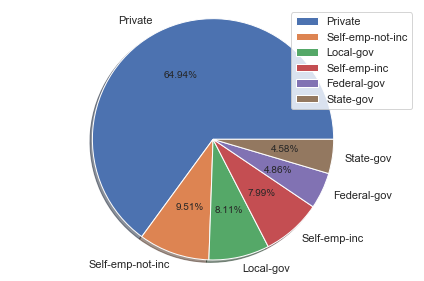

In [24]:


# This Pie chat shows the Percentage of different workclass who earns more than 50K
plt.pie(aggregate, labels = labels, autopct='%1.2f%%', shadow=True)
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [52]:
df['income'] = df['income'].str.replace(r'>50K.', '>50K')
df['income'] = df['income'].str.replace(r' <=50K', '<=50K')
df['income'] = df['income'].str.replace(r'>50K.', '>50K')
df['education'] = df['education'].str.replace(r' ', '')
df['income'] = df['income'].str.replace(r' >50K.', '>50K')
df['income'] = df['income'].str.replace(r' >50K', '>50K')
df['income'] = df['income'].str.replace(r' <=50K.', '<=50K')
df['income'] = df['income'].str.replace(r'<=50K.', '<=50K')
df['native.country'] = df['native.country'].str.replace(r' ', '')

In [53]:
education_size =df.groupby('education').size()
education_size.head()

education
10th       1223
11th       1619
12th        577
1st-4th     222
5th-6th     449
dtype: int64

In [44]:
more_income = df.loc[df['income'] == '>50K', ['education']].groupby('education').size()
more_income.head()

education
10th       82
11th       89
12th       43
1st-4th     8
5th-6th    22
dtype: int64

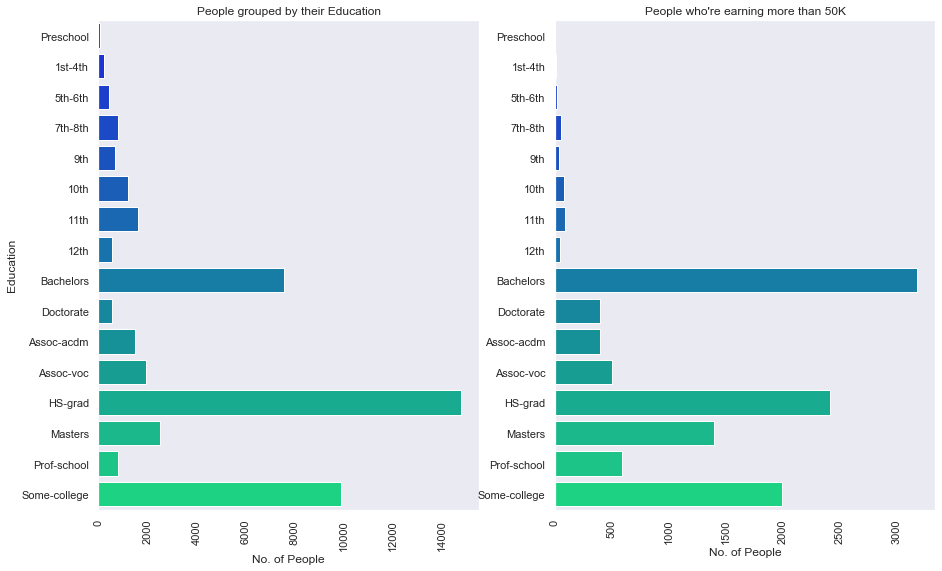

In [45]:
##Grouping people by their education
education_size =df.groupby('education').size()


# Grouping people who earns more than 50K by their education
more_income = df.loc[df['income'] == '>50K', ['education']].groupby('education').size()

sns.set(style = 'dark')
plt.rcParams['figure.figsize'] = [15, 9]
fig, ax = plt.subplots(1,2)

# Setting axes Labels and Titles
ax[0].set_ylabel("Education")
ax[0].set_xlabel("No. of People")
ax[1].set_xlabel("No. of People")
ax[0].title.set_text("People grouped by their Education")
ax[1].title.set_text("People who're earning more than 50K")

# Barplot for the people grouped by their education
sns_ed_1 = sns.barplot(x = list(education_size), y = list(education_size.index), palette = 'winter',
                       order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Bachelors', 'Doctorate',
                                'Assoc-acdm', 'Assoc-voc', 'HS-grad', 'Masters', 'Prof-school', 'Some-college'], ax = ax[0])
# Barplot for the people who earns more than 50K grouped by their education
sns_ed_2 = sns.barplot(x = list(more_income), y = list(more_income.index), palette = 'winter',
                       order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Bachelors', 'Doctorate',
                                'Assoc-acdm', 'Assoc-voc', 'HS-grad', 'Masters', 'Prof-school', 'Some-college'], ax = ax[1])

plt.setp(sns_ed_1.get_xticklabels(), rotation = 90);
plt.setp(sns_ed_2.get_xticklabels(), rotation = 90);
plt.show()

In [46]:
dataframe['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [54]:
# Grouping people according to their country and their income
df = df[df['native.country'] != '?']
native_more = df.loc[df['income'] == '>50K',['native.country']].groupby('native.country').size()
native_less = df.loc[df['income'] == '<=50K',['native.country']].groupby('native.country').size()

index_more = list(native_more.index)
index_less = list(native_less.index)

# Checking if the Countries in both aspects are same or not
print(index_more)
print(len(index_more))
print(index_less)
print(len(index_less))

['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia']
40
['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia']
41


In [62]:
# Checking which Countries are not in the list
[country for country in index_less if country not in index_more]

['Holand-Netherlands']

In [63]:
# Making DataFrames of the Data
df_more = pd.DataFrame({'Countries' : index_more, '>50K' : list(native_more) })
df_less = pd.DataFrame({'Countries' : index_less, '<=50K' : list(native_less) })

# Adding the entries of the missing countries
df_more.loc[40] = 'Holand-Netherlands', 0
df_more.loc[41] = 'Outlying-US(Guam-USVI-etc)', 0

df_more

,Countries,>50K
0,Cambodia,9
1,Canada,60
2,China,36
3,Columbia,4
4,Cuba,34
5,Dominican-Republic,5
6,Ecuador,6
7,El-Salvador,11
8,England,47
9,France,16


In [64]:
# Merging both the Data Frames to be used for plotting
df_fin = pd.merge(df_less, df_more, on = 'Countries')

df_fin

,Countries,<=50K,>50K
0,Cambodia,17,9
1,Canada,103,60
2,China,77,36
3,Columbia,78,4
4,Cuba,99,34
5,Dominican-Republic,92,5
6,Ecuador,37,6
7,El-Salvador,136,11
8,England,72,47
9,France,20,16


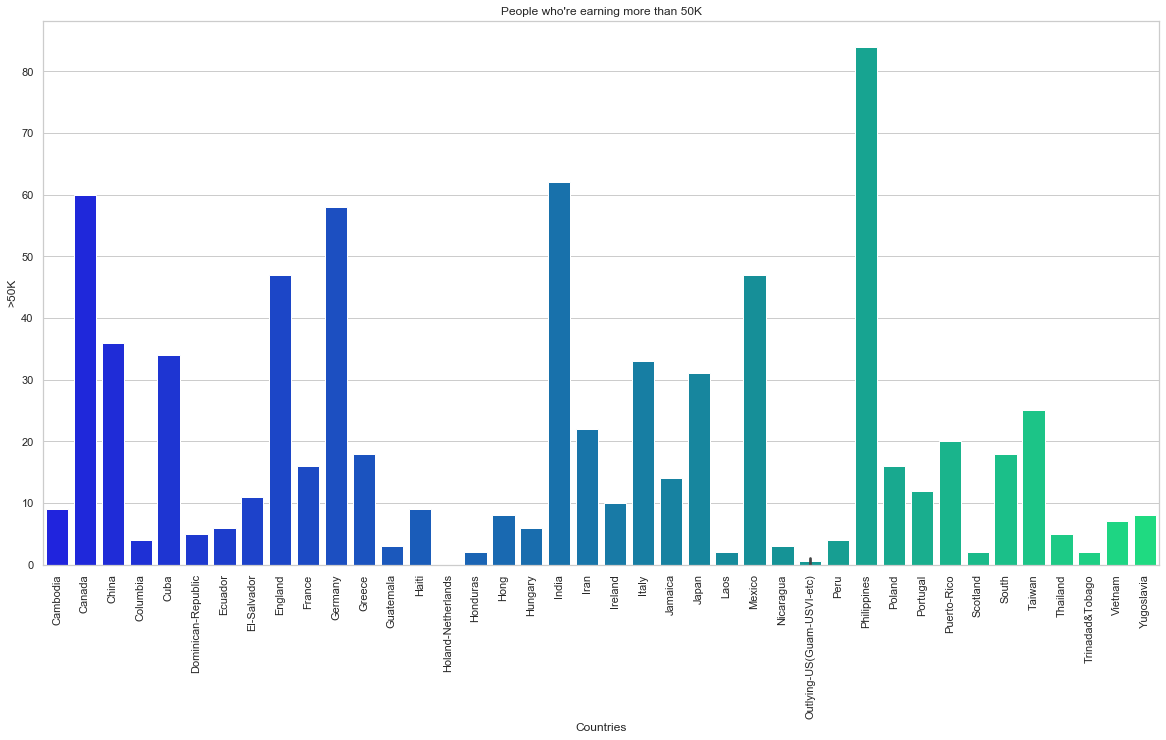

In [65]:
sns.set(style = 'whitegrid')
plt.rcParams['figure.figsize'] = [20,10]
# Dropping the United States Row as there's a disparity between US and other Countries
df_fin = df_fin.drop([39])

# This Bar plot shows which country's people after US make more than 50K a year

sns_ = sns.barplot(x = df_fin['Countries'], y = df_fin['>50K'], data = df_fin, palette = 'winter')
sns_.title.set_text("People who're earning more than 50K")

plt.setp(sns_.get_xticklabels(), rotation = 90);

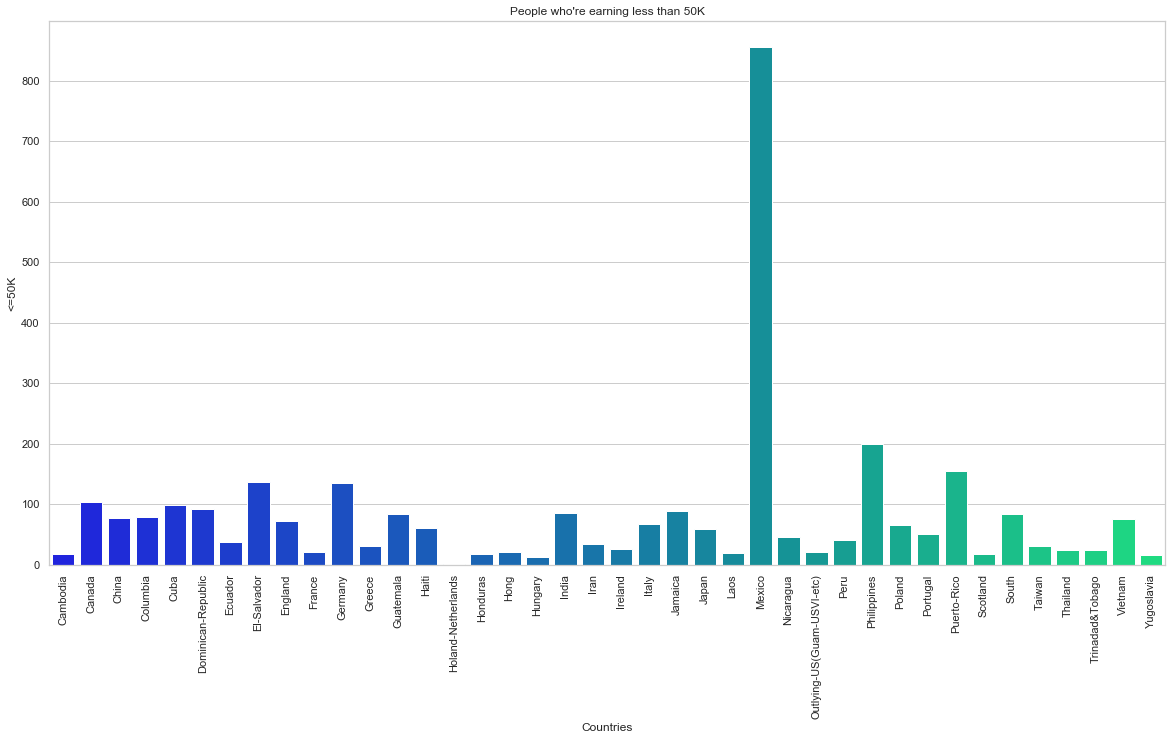

In [67]:
# This Bar plot shows which country's people after US make less than 50K a year

sns__ = sns.barplot(x = df_fin['Countries'], y = df_fin['<=50K'], data = df_fin, palette = 'winter')
sns__.title.set_text("People who're earning less than 50K")

plt.setp(sns__.get_xticklabels(), rotation = 90);

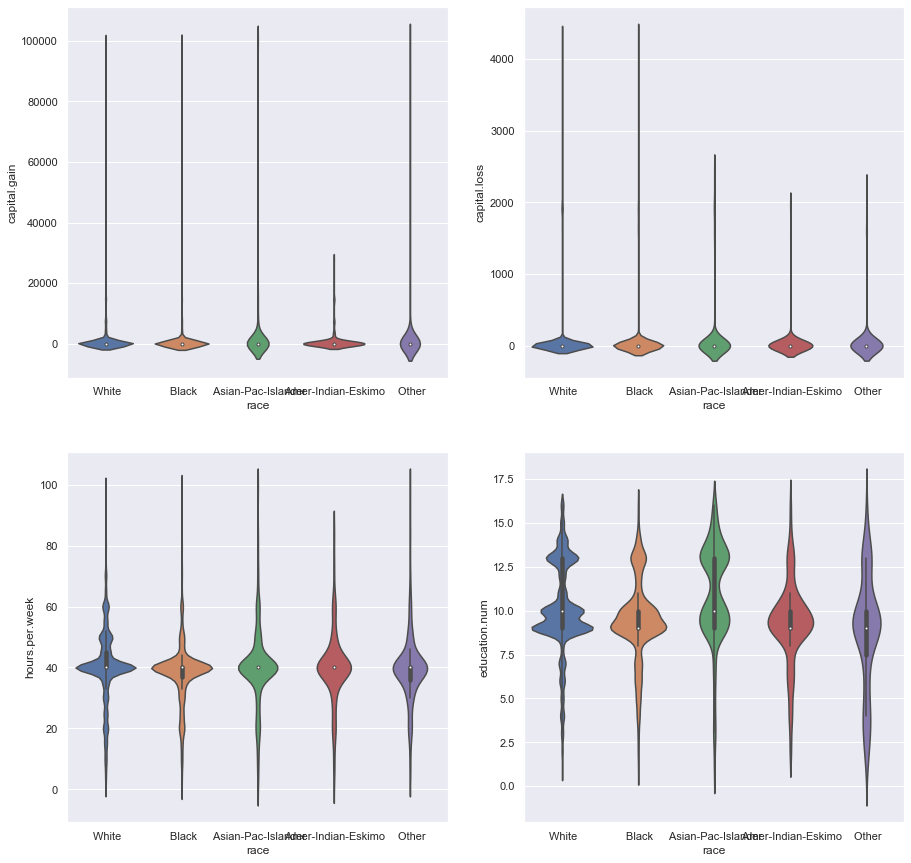

In [68]:
# Setting Parameters
plt.rcParams['figure.figsize'] = [15,15]
sns.set(style = 'darkgrid')                               

# This Violin plot show how capital gain, loss, hours per week and education vary with the race of the people
plt.subplot(2,2,1)
sns.violinplot(x = dataframe['race'], y = dataframe['capital.gain'], data = dataframe);
plt.subplot(2,2,2)
sns.violinplot(x = dataframe['race'], y = dataframe['capital.loss'], data = dataframe);
plt.subplot(2,2,3)
sns.violinplot(x = dataframe['race'], y = dataframe['hours.per.week'], data = dataframe);
plt.subplot(2,2,4)
sns.violinplot(x = dataframe['race'], y = dataframe['education.num'], data = dataframe);

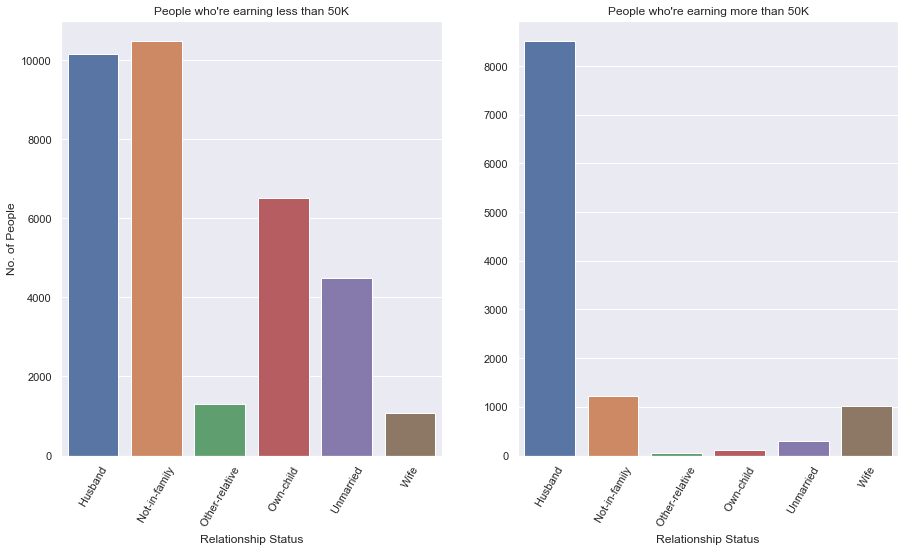

In [70]:
# Setting Parameters
plt.rcParams['figure.figsize'] = [15,8]
fig, ax = plt.subplots(1,2)

# Setting axes Labels and Titles
ax[0].set_ylabel("No. of People")
ax[0].set_xlabel("Relationship Status")
ax[1].set_xlabel("Relationship Status")
ax[0].title.set_text("People who're earning less than 50K")
ax[1].title.set_text("People who're earning more than 50K")

# Grouping people according to their Income and Relationship Status 
rel_less = df.loc[df['income'] == '<=50K',['relationship']].groupby('relationship').size()
rel_more = df.loc[df['income'] == '>50K',['relationship']].groupby('relationship').size()

# This barplot shows the No.of people earning more or less than 50K according to their Relationship Status
sns_rel_1 = sns.barplot(x = list(rel_less.index), y = list(rel_less), ax = ax[0])
sns_rel_2= sns.barplot(x = list(rel_more.index), y = list(rel_more), ax = ax[1])

plt.setp(sns_rel_1.get_xticklabels(), rotation = 60);
plt.setp(sns_rel_2.get_xticklabels(), rotation = 60);


In [76]:
df['race'] = df['race'].str.replace(r' ', '')

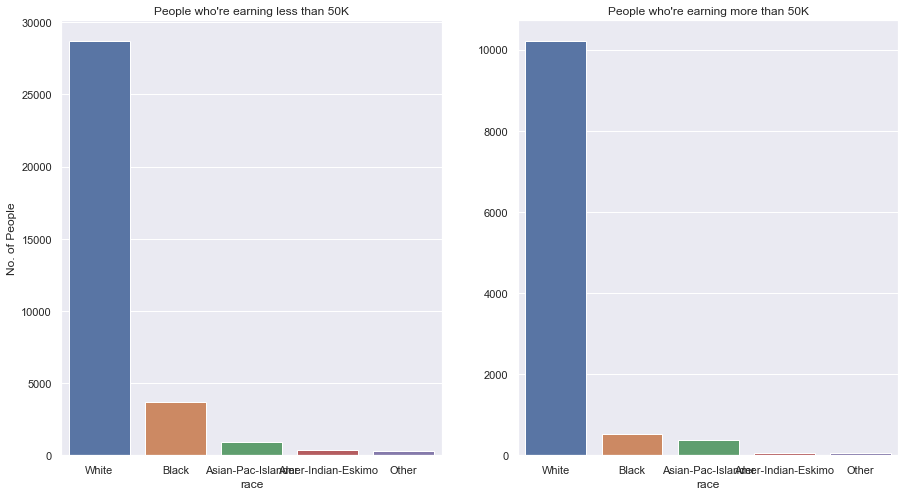

In [78]:
# Setting axes Labels and Titles 
fig, ax = plt.subplots(1,2)
ax[0].set_xlabel('race')
ax[1].set_xlabel('race')
ax[0].set_ylabel('No. of People')
ax[0].title.set_text("People who're earning less than 50K")
ax[1].title.set_text("People who're earning more than 50K")

# Grouping People according to their race and income
race_less = df.loc[df['income'] == '<=50K'].groupby('race').size()
race_more = df.loc[df['income'] == '>50K'].groupby('race').size()

# This barplot shows the no.of people earning more or less than 50K according to their races
sns_race_1 = sns.barplot(x = list(race_less.index), y = list(race_less), ax = ax[0],
                         order = ['White', 'Black','Asian-Pac-Islander', 'Amer-Indian-Eskimo','Other'])
sns_race_2 = sns.barplot(x = list(race_more.index), y = list(race_more), ax = ax[1],
                        order = ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo','Other'])


In [167]:
# Copying the eda adult dataFrame and reseting the index
df_adult = df.copy()

df_adult = df_adult.reset_index(drop = True)
df_adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [150]:
# Changing the income column into Numerical Value
df_adult['income'] = df_adult['income'].map({'<=50K':0, '>50K':1})


In [216]:
df_adult['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [225]:
df_adult.dtypes

age                object
workclass          object
fnlwgt            float64
education          object
education.num     float64
marital.status     object
occupation         object
relationship       object
race               object
sex                object
capital.gain      float64
capital.loss      float64
hours.per.week    float64
native.country     object
income             object
dtype: object

In [220]:
# Categorical boolean mask
categorical_feature_mask = df_adult.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df_adult.columns[categorical_feature_mask].tolist()

In [221]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [ ]:
df_adult['col_name'] = pd.to_numeric(df['col_name'], errors='coerce')

In [224]:
# apply le on categorical feature columns
df_adult[categorical_cols] = df_adult[categorical_cols].apply(lambda col: le.fit_transform(col))

TypeError: ('argument must be a string or number', 'occurred at index age')

In [213]:
# select algorithm
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import AdaBoostClassifier
#clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),algorithm="SAMME",n_estimators=200)
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(loss='deviance', n_estimators=100, learning_rate=1.0,max_depth=2, random_state=0)

In [214]:
# Importing the required libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
import warnings; warnings.simplefilter('ignore')

In [215]:
# Training the model_1
logistic = LogisticRegression(C = 0.5, max_iter = 500)
model_1 = logistic.fit(X_train, y_train)

# Predictions
pred_1 = model_1.predict(X_test)

print ("The accuracy of model 1 : ",accuracy_score(y_test, pred_1))
print ("The f1 score of model 1 : ", f1_score(y_test, pred_1, average = 'binary'))


ValueError: could not convert string to float: 'United-States'

In [ ]:
# Training the model_2
R_forest = RandomForestClassifier(n_estimators = 200)
model_2 = R_forest.fit(X_train, y_train)

# Predictions
pred_2 = model_2.predict(X_test)

print ("The accuracy of model 2 : ",accuracy_score(y_test, pred_2))
print ("The f1 score of model 2 : ", f1_score(y_test, pred_2, average = 'binary'))

In [ ]:
# Training the model 3
boosted_gd = XGBClassifier(learning_rate = 0.35, n_estimator = 200)
model_3 = boosted_gd.fit(X_train, y_train)

# Predictions
pred_3 = model_3.predict(X_test)

print ("The accuracy of model 3 : ",accuracy_score(y_test, pred_3))
print ("The f1 score of model 3 : ", f1_score(y_test, pred_3, average = 'binary'))

In [ ]:
# Training the model 4
NB = BernoulliNB(alpha = 0.3)
model_4 = NB.fit(X_train, y_train)

# Predictions
pred_4 = model_4.predict(X_test)

print ("The accuracy of model 4 : ",accuracy_score(y_test, pred_4))
print ("The f1 score of model 4 : ", f1_score(y_test, pred_4, average = 'binary'))

In [ ]:
# Training the model 5
svc = SVC(kernel = 'rbf', max_iter = 1000, probability = True)
model_5 = svc.fit(X_train, y_train)

# Predictions
pred_5 = model_5.predict(X_test)

print ("The accuracy of model 5 : ",accuracy_score(y_test, pred_5))
print ("The f1 score of model 5 : ", f1_score(y_test, pred_5, average = 'binary'))

In [ ]:
list_pred = [pred_1, pred_2, pred_3, pred_4, pred_5]
model_names = ["Logistic Regression", "Random Forest Classifier", "Boosted Gradient Descent", "Bernoulli NB", "SVC"]

for i, predictions in enumerate(list_pred) :
    print ("Classification Report of ", model_names[i])
    print ()
    print (classification_report(y_test, predictions, target_names = ["<=50K", ">50K"]))

In [ ]:
for i, pred in enumerate(list_pred) :
    print ("The Confusion Matrix of : ", model_names[i])
    print (pd.DataFrame(confusion_matrix(y_test, pred)))
    print ()

In [205]:
# ROC Curve for the classification models

from sklearn.metrics import roc_auc_score, roc_curve
models = [model_1, model_2, model_3, model_4, model_5]

# Setting the parameters for the ROC Curve
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")

color = ['red', 'blue', 'green', 'fuchsia', 'cyan']
plt.title("ROC CURVE", fontsize = 15)
plt.xlabel("Specificity", fontsize = 15)
plt.ylabel("Sensitivity", fontsize = 15)
i = 1

for i, model in enumerate(models) :
    prob = model.predict_proba(X_test)
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, prob_positive)
    plt.plot(fpr, tpr, color = color[i])
    plt.gca().legend(model_names, loc = 'lower right', frameon = True)

plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()

NameError: name 'model_1' is not defined

In [204]:
# TODO: Total number of records
n_records = len(df)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(df.query('income == ">50K"'))

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(df.query('income == "<=50K"'))

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = (float(n_greater_50k) / n_records * 100)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


In [226]:
# Dropping the rows whose occupation is '?' 
df = df[df.occupation != '?']

df['occupation'].value_counts()

 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales                5408
 Other-service        4808
 Machine-op-inspct    2970
 Transport-moving     2316
 Handlers-cleaners    2046
 Farming-fishing      1480
 Tech-support         1420
 Protective-serv       976
 Priv-house-serv       232
 Armed-Forces           14
Name: occupation, dtype: int64

# Evaluating Model Performance
######3

In [228]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Params for Random Forest
num_trees = 100
max_features = 3

#Spot Check 5 Algorithms (LR, LDA, KNN, CART, GNB, SVM)
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
#models.append(('SVM', SVC()))
# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

NameError: name 'Y_train' is not defined

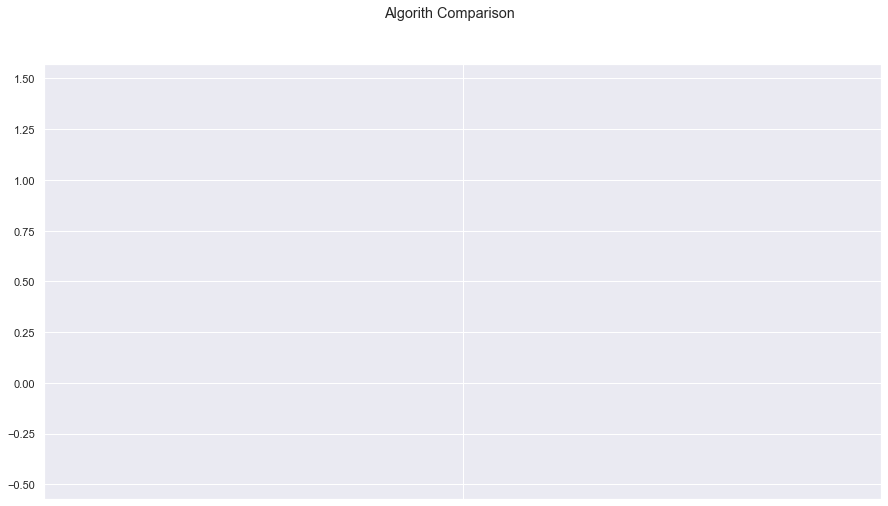

In [229]:
# Model Comparison
fig = plt.figure()
fig.suptitle('Algorith Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [230]:
random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_test)
print("Accuracy: %s%%" % (100*accuracy_score(Y_test, predictions)))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

NameError: name 'Y_train' is not defined